# Level 2 : Stock Market Price Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

### Data collection

In [2]:
data = pd.read_csv('INR=X.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0
...,...,...,...,...,...,...,...
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903,0


### Data Preprocessing

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0
...,...,...,...,...,...,...,...
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903,0


### Feature Engineering

In [4]:
# Step 3: Feature Engineering
# You can add technical indicators using libraries like ta (Technical Analysis Library)
# For simplicity, let's consider only the 'Close' price as the feature
features = data[['Close']]

### Splitting Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, data['Close'], test_size=0.2, random_state=42)

### Model1 (Linear Regression) Selection, Training, Evaluation

In [6]:
# Model Selection
model = LinearRegression()

In [7]:
# Model Training
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.0
Mean Absolute Error: 0.0


### Visualization

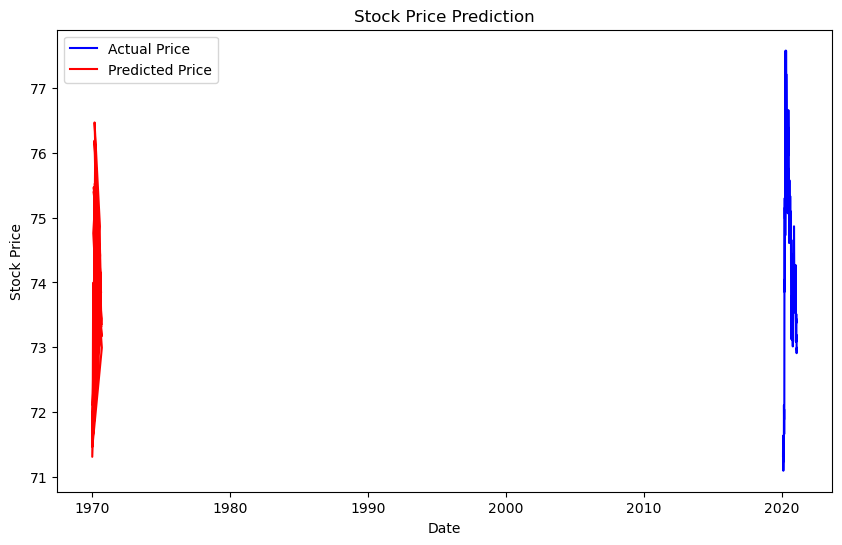

In [9]:
# Visualization and Interpretation
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Actual Price', color='b')
plt.plot(X_test.index, y_pred, label='Predicted Price', color='r')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Stock Price Prediction')
plt.show()

**A blue line representing the actual stock prices over time. Each data point on this line will correspond to a specific trading day, and the vertical position of the data point will represent the actual closing price of the financial instrument on that day.**

**A red line representing the predicted stock prices over time. Similarly, each data point on this line will correspond to a specific trading day, and the vertical position of the data point will represent the predicted closing price of the financial instrument on that day**

### Model 2 (GradientBoosting Regressor) selection

In [10]:
# Model Selection
model = GradientBoostingRegressor(random_state=42)

# Model Training
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

### Hyperparameter Tuning (GridSearchCV)

In [11]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

### Model Evaluation

In [12]:
# Model Evaluation (on the best model from hyperparameter tuning)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Best Model Parameters: {best_params}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Best Model Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Mean Squared Error: 0.000692576476850339
Mean Absolute Error: 0.01739979992367418


### Visualization

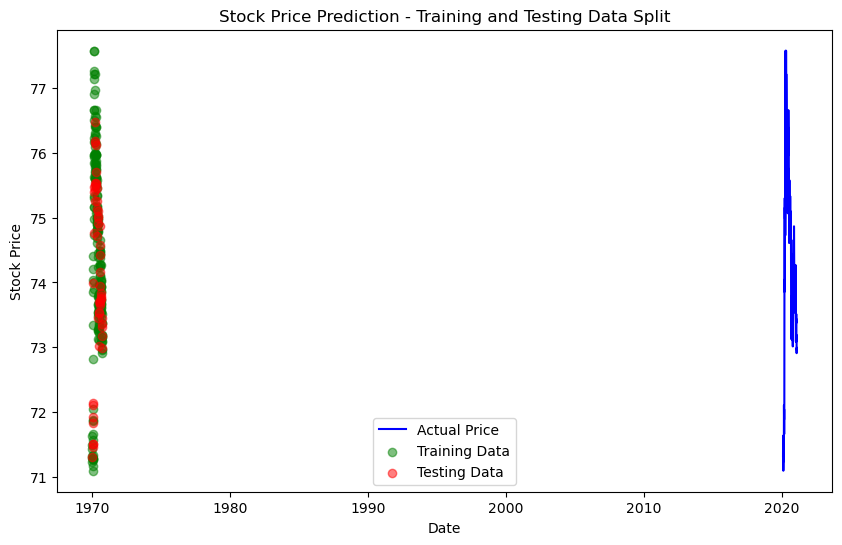

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Actual Price', color='b')
plt.scatter(X_train.index, y_train, label='Training Data', color='g', alpha=0.5)
plt.scatter(X_test.index, y_test, label='Testing Data', color='r', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Stock Price Prediction - Training and Testing Data Split')
plt.show()


**Line Plot (Blue Line - "Actual Price"):
The blue line represents the actual stock prices over time. The x-axis corresponds to the "Date" values, while the y-axis corresponds to the "Close" values.
Each point on the line represents the closing price of the stock on a specific date. The line connects these points, showing the overall trend in stock prices over the given time period.
If you look closely, you'll notice how the stock prices fluctuate over time, and the line may exhibit upward or downward trends depending on the stock's performance.**

**Scatter Points (Green Points - "Training Data"):
The green scatter points represent the training data used to build the stock price prediction model. The x-axis shows the index of the training data, while the y-axis shows the corresponding stock prices ("Close" values).
Each green point represents one data point from the training dataset, which consists of a combination of "Date" and "Close" values.
The transparency of the points (alpha=0.5) makes them partially transparent, so you can see both the underlying line plot and the training data points.**

**Scatter Points (Red Points - "Testing Data"):
The red scatter points represent the testing data used to evaluate the performance of the stock price prediction model. The x-axis shows the index of the testing data, while the y-axis shows the corresponding stock prices ("Close" values).
Each red point represents one data point from the testing dataset, which also consists of a combination of "Date" and "Close" values.
Similar to the green points, the transparency of the red points (alpha=0.5) allows you to see both the line plot and the testing data points.**

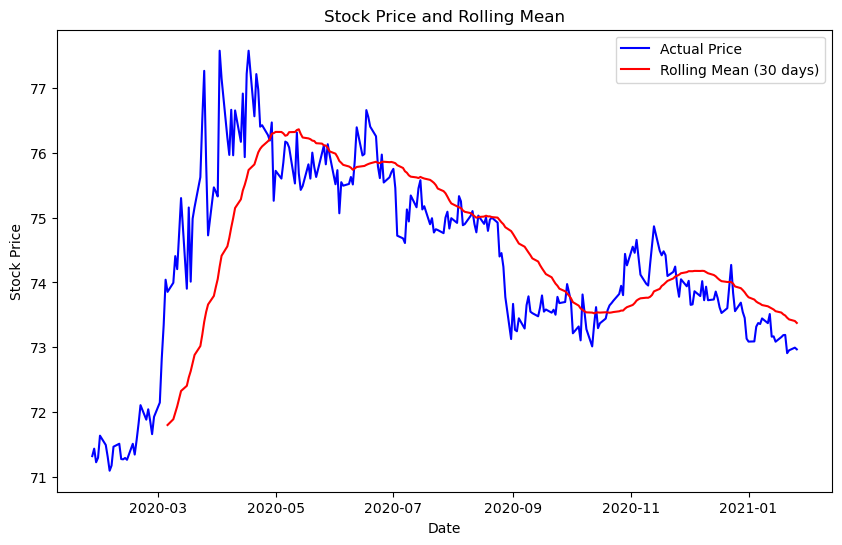

In [14]:
window_size = 30  # Choose an appropriate window size for the rolling mean
rolling_mean = data['Close'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Actual Price', color='b')
plt.plot(data['Date'], rolling_mean, label=f'Rolling Mean ({window_size} days)', color='r')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Stock Price and Rolling Mean')
plt.show()


**Trend Identification: By comparing the actual price line (blue) and the rolling mean line (red), we can observe the general trend of the stock's price movement. When the red line is rising, it indicates an upward trend, and when it is falling, it indicates a downward trend. Changes in the direction of the red line can be significant in understanding shifts in the stock's price movement.**

**Short-term Fluctuations: The blue line may exhibit short-term fluctuations, which can be caused by various factors like daily market sentiment, news, or other events. The red line smooths out these fluctuations, making it easier to see the broader price trend.**

**Moving Average Crossovers: Observing the points where the blue line crosses the red line can be useful. A blue line crossing above the red line might indicate a potential upward price movement, while a blue line crossing below the red line might indicate a potential downward price movement.**